<a href="https://www.kaggle.com/code/tusharaggarwal27/titanic-survivor-predict-with-lightgbm?scriptVersionId=116330666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          🚢🛳️((Titanic Survivor Predict with LightGBM))🚢🛳️
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:18px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this project, I made a model with high accuracy to predict the Titanic survivor with LightGBM,</b>
    <br><br>
    <b>The Challenge:
        <br>
The sinking of the Titanic is one of the most infamous shipwrecks in history.</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    <br><br>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
    <br><br>
    In this challenge, i have to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
  
</div>



<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Importing the required Libraries
    
   </p>

In [1]:
import seaborn as sns
import sys
import csv
import datetime
import operator
import joblib
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import ols
from sklearn.metrics import cohen_kappa_score
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import norm, skew, probplot

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Reading the Dataset
    
   </p>

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">EDA for the Data
    
   </p>

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head(5)
# When using head(), it can be expected that the result of test data can be predicted through PassengerId.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Check if the 'Survived' column is attached properly.
df_test['Survived'] = gender_submission['Survived']
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">EDA with Pairplot (for multiple pairwise bivariate distributions)
    
   </p>


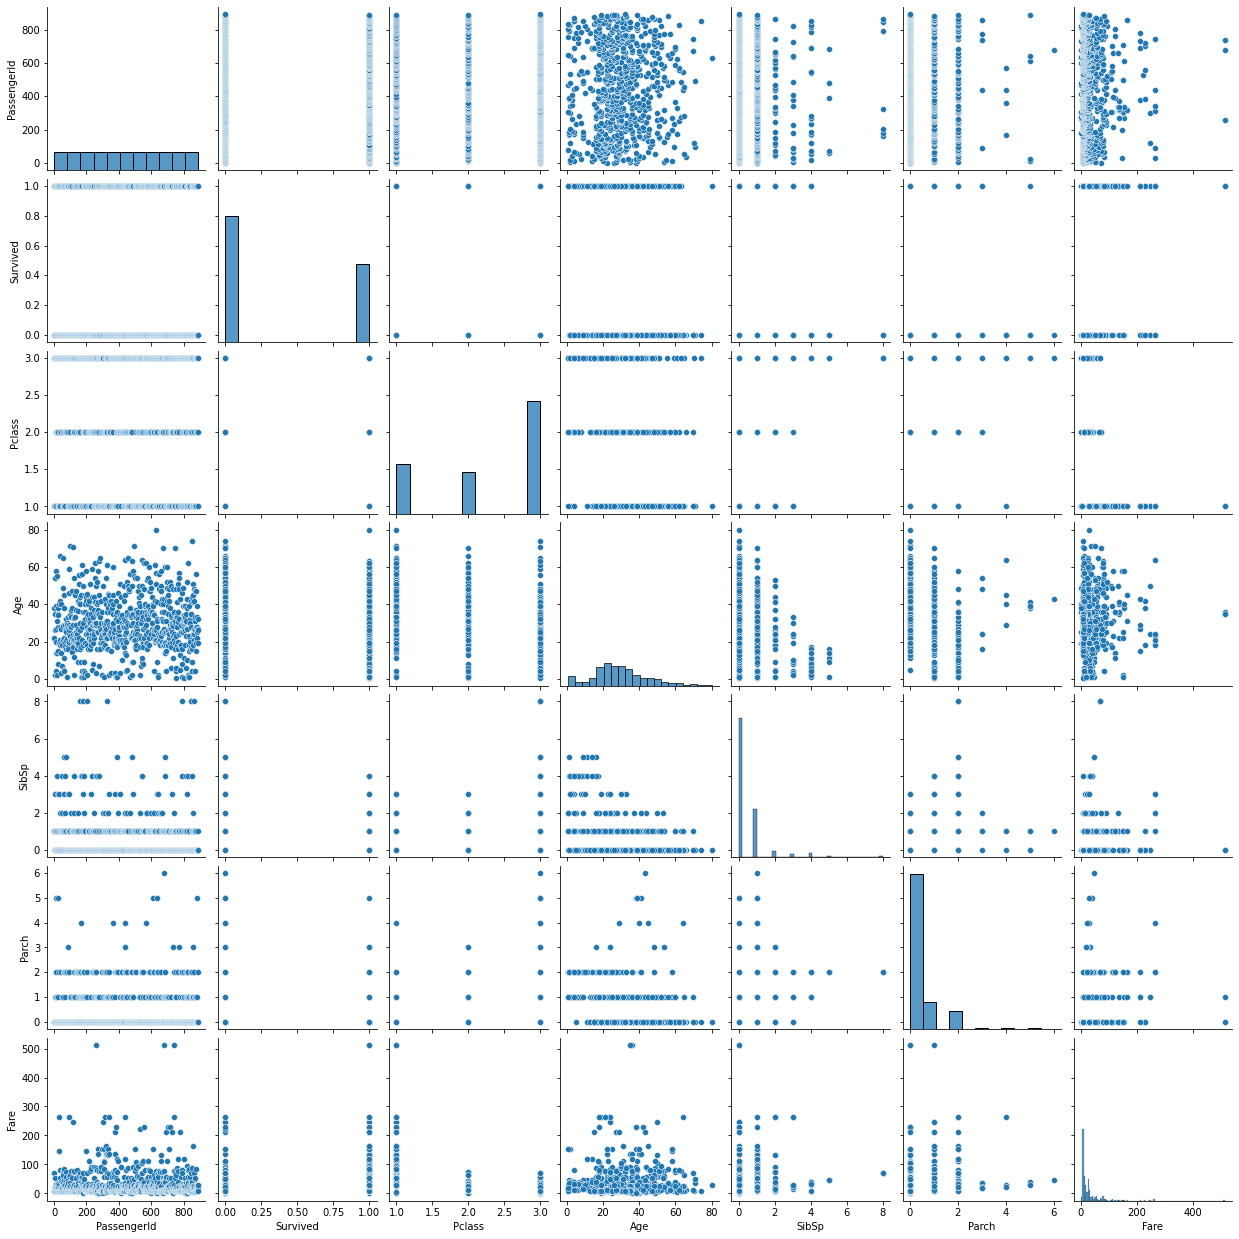

In [7]:
# Let's analyze how the distribution is statistically through pair plots and several graphs.
sns.pairplot(data = df_train)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">The first graph now is the result of heatmap analysis of data. The higher the correlation, the darker the color.
    <br>The second graph graphed the null ratio.
    
   </p>

In [8]:
def analysis(data):
    sns.heatmap(data.corr(), annot=True, cmap='Reds')
    null_percent = 100*(data.isnull().sum()/len(data))
    null_percent = null_percent[null_percent>0].sort_values()
    plt.figure(figsize= (10,4))
    sns.barplot(x=null_percent.index, y= null_percent)
    plt.xticks(rotation=90)

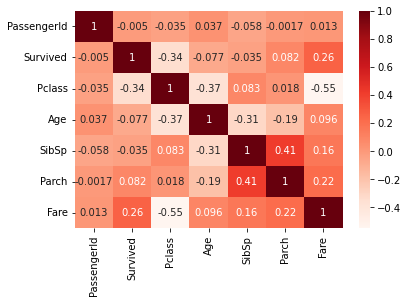

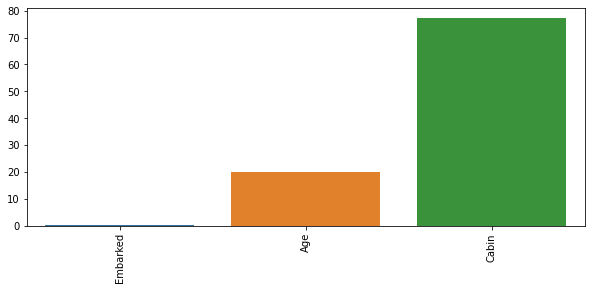

In [9]:
#For df_train
analysis(df_train)

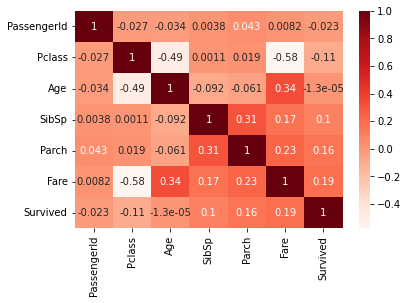

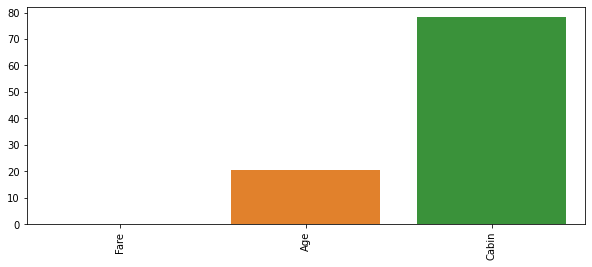

In [10]:
#For df_test
analysis(df_test)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now using OLS Regression
   </p>

In [11]:
fat=ols(formula='Survived~PassengerId+Pclass+Age+Sex+SibSp+Parch+Fare+Embarked', data=df_train).fit()
print(fat.summary())
# Statistically, it was found that the survival rate was the most influential according to the classification according to gender and Pclass.
# When predicting with OLS regression, if we consider only the above 8 variables, it was expected that the R-squre 0.4/ Adjust R-square 0.39 level could be predicted.

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     52.39
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.41e-72
Time:                        10:30:24   Log-Likelihood:                -320.62
No. Observations:                 712   AIC:                             661.2
Df Residuals:                     702   BIC:                             706.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3786      0.086     16.100

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now numeric dtype Feature Enginearing
   </p>


In [12]:
num_cols = [col for col in df_train.columns if df_train[col].dtype in ['int64','float64']]

df_train[num_cols].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Now, finfind correlation for df_train
df_train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, checking for duplicate values in the data
   </p>


In [14]:
#Checking metadata for df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Dropping duplicates
df_train=df_train.drop_duplicates()

In [16]:
#Checking for difference
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, checking for skewness and kurtosis
   </p>
​

skew: 0.4785234382949897
kert: -1.775004671066304


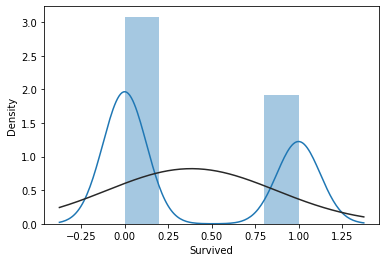

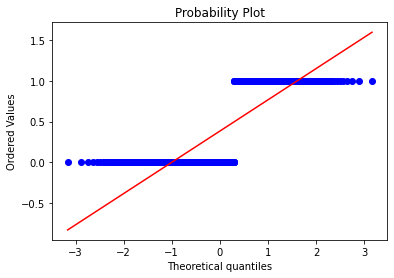

In [17]:
# When checking skewness and kurtosis, it is often seen in Regression Modeling, but in this case, we could not simply obtain information other than that the distribution of Y-value (Survived) we wanted to know was 3:2.
print(f'skew: {df_train.Survived.skew()}')
print(f'kert: {df_train.Survived.kurt()}')
sns.distplot(df_train.Survived, fit = norm)
f = plt.figure()
probplot(df_train.Survived, plot = plt)
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Countplots
   </p>


In [18]:
def count_plot(d, y, x):
    plt.figure(figsize=(12,6))
    sns.countplot(x = d[y], hue = x, data=d)
    plt.ylabel('Number of people')
    plt.title('Survival count by '+ x)

Columns with more than 20 variables in the column are as shown below.The distribution of numbers of columns and survivors with less than 20 variables is as shown in the graph.
['PassengerId', 'Age', 'Fare']


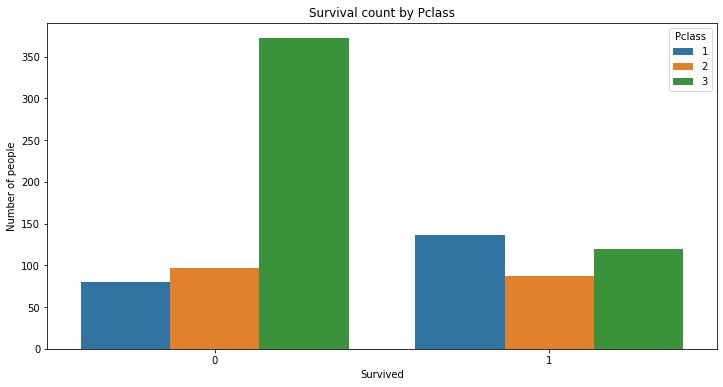

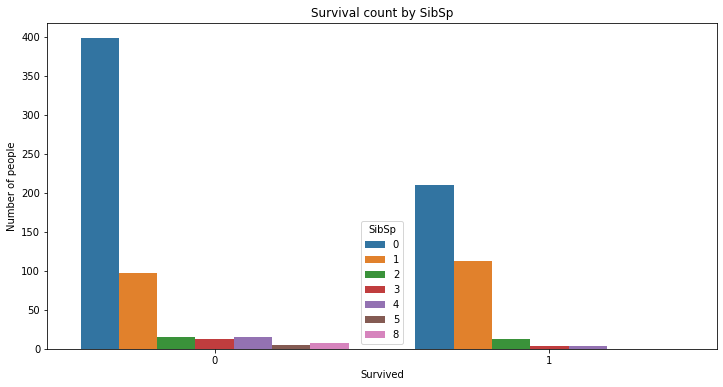

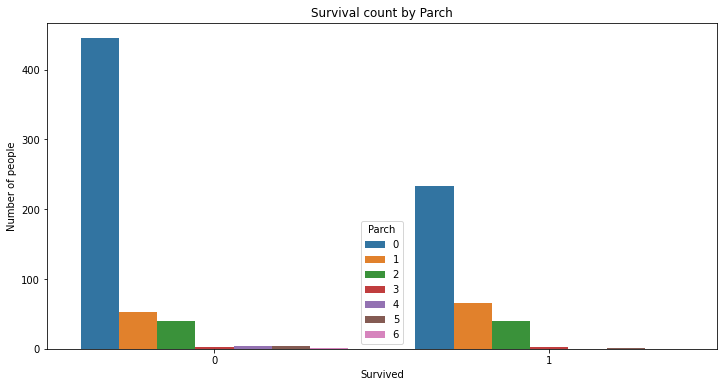

In [19]:
numeric_cols = [col for col in df_train if df_train[col].dtype in ['int64','float64']]
numeric_cols.remove('Survived')
y = 'Survived'
over_column_name = list()

for i in numeric_cols:
    if (len(df_train[i].value_counts())<20):
        count_plot(df_train, y, i)
    elif (len(df_train[i].value_counts())>20):
        over_column_name.append(i)

print('Columns with more than 20 variables in the column are as shown below.The distribution of numbers of columns and survivors with less than 20 variables is as shown in the graph.')
print(over_column_name)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


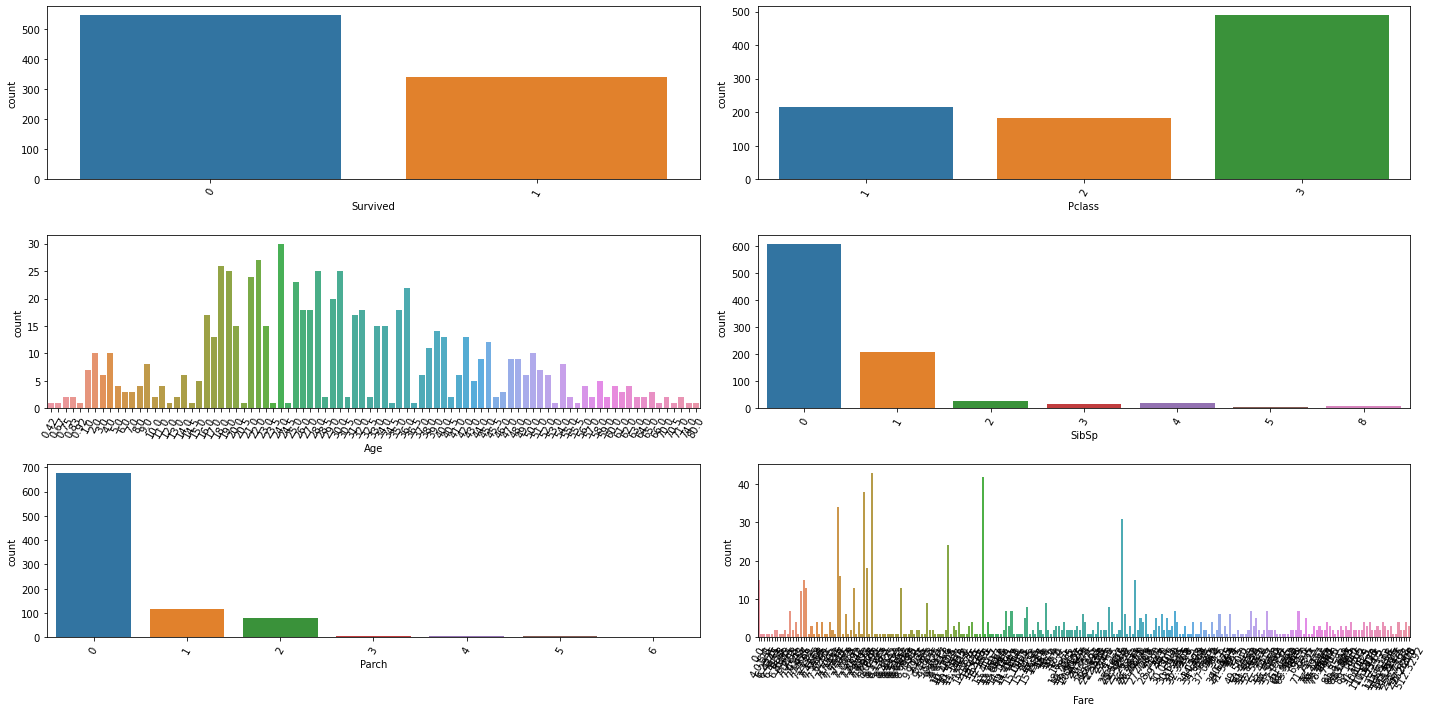

In [20]:
print(num_cols)
num_cols.remove('PassengerId')

fig, ax = plt.subplots(3, 2, figsize=(20, 10))

for variable, subplot in zip(num_cols, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(60)
        
plt.tight_layout()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, For Category columns
   </p>

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


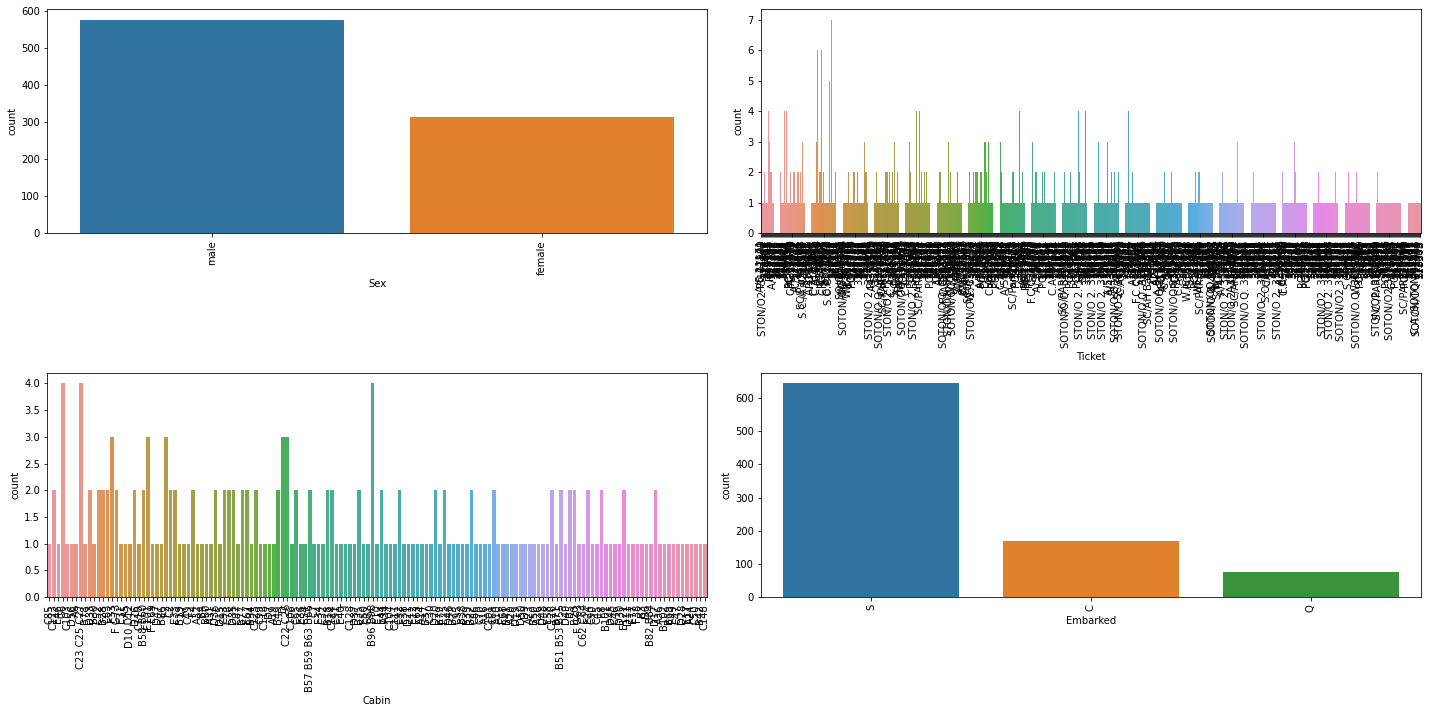

In [21]:
cat_cols = [col for col in df_train if df_train[col].dtype not in ['int64','float64']]
print(cat_cols)
cat_cols.remove('Name')

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
plt.tight_layout()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Checking for missing values and dropping them
   </p>

In [22]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#Dropping missing values
df_train=df_train.drop(['Name','Ticket'],axis=1)
df_test=df_test.drop(['Name','Ticket'],axis=1)

In [24]:
# Cabin It's a waste to throw away all the information, so I'm thinking of using the number of characters as a variable.
# Rather than deleting the Cabin column, I will use "len()" to use the number of characters in the variable.
df_train['CabinCode'] = df_train['Cabin'].apply(lambda x : len(str(x)) if x!='nan' else 0)
df_test['CabinCode'] = df_test['Cabin'].apply(lambda x  : len(str(x)) if x!='nan' else 0)

In [25]:
df_train=df_train.drop(['Cabin'],axis=1)
df_test=df_test.drop(['Cabin'],axis=1)

In [26]:
# Assuming that the nan value is also a variable, in this analysis, we will proceed without correction for the null value.

df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [27]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   CabinCode    891 non-null    int64  
 8   Sex_female   891 non-null    uint8  
 9   Sex_male     891 non-null    uint8  
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 99.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerI

In [28]:
df_train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinCode,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,3,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,3,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,3,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,4,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,3,0,1,0,0,1


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Building the Model - LGBMClassifier
   </p>

In [29]:
from sklearn.model_selection import train_test_split

random_state_val =42 #Choosing this value
test_size_val =0.3
train,validation = train_test_split(df_train, test_size = test_size_val, random_state = random_state_val)

In [30]:
#Defining variables
drop_col = ['Survived']
y_nm = 'Survived'

df_train_x = train.drop(drop_col, axis = 1)
df_train_y = pd.DataFrame(train[y_nm])

df_val_x = validation.drop(drop_col, axis = 1)
df_val_y = pd.DataFrame(validation[y_nm])

df_test_x = df_test.drop(drop_col, axis = 1)
df_test_y = pd.DataFrame(df_test[y_nm])

In [31]:
#Now creating LGBMClassifier and adjusting hyperparas
LGBClassifier = lgb.LGBMClassifier(objective='binary',
                                   max_depth = 8,
                                   learning_rate = 0.01,
                                   n_estimators = 9000,
                                   max_bin = 200,
                                   bagging_freq = 4,
                                   bagging_seed = 8,
                                   feature_fraction = 0.2,
                                   feature_fraction_seed = 8,
                                   min_sum_hessian_in_leaf = 11,
                                   verbose = -1,
                                   random_state = 42)

In [32]:
#Fitting the model on LGBMClassifier
start = datetime.datetime.now()
lgbm = LGBClassifier.fit(df_train_x.values,
                       df_train_y.values.ravel(),
                       eval_set = [(df_train_x.values, df_train_y), (df_val_x.values, df_val_y)],
                       eval_metric ='logloss',
                       early_stopping_rounds = 20,
                       verbose =False)
end = datetime.datetime.now()
end-start

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


datetime.timedelta(microseconds=272765)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Checking the variables that have a major impact, and graphing them.
   </p>

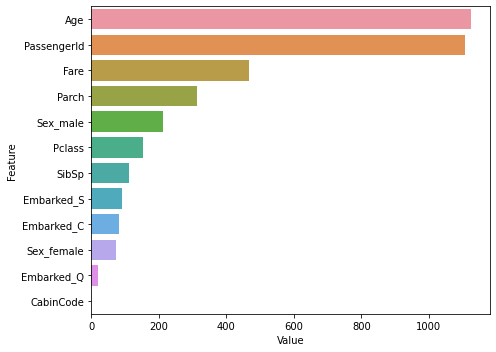

<Figure size 432x288 with 0 Axes>

In [33]:
feature_imp= pd.DataFrame(sorted(zip(lgbm.feature_importances_, df_test_x.columns), reverse = True), columns = ['Value', 'Feature'])
feature_imp.to_excel("feature_imp.xlsx")

plt.figure(figsize=(7,5))
sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False))
plt.tight_layout()
plt.show()
plt.savefig('lightGBM_ Importances.png')

In [34]:
# I put the logic that yields the highest accuracy using a for loop.

result_lst =[]
max_accuracy =0.
opt_threshold =0.
val_y_prob = lgbm.predict_proba(df_val_x.values)[:, 1]

for n in range(0,60):
    threshold = round(((n+1)*0.01),2)
    pred_yn = val_y_prob.copy()
    pred_yn = np.where(pred_yn > threshold, 1., 0.)
    
    result_dict = {}
    precision, recall, f1_score, support = precision_recall_fscore_support(df_val_y.values.ravel(), pred_yn, average='binary')
    accuracy = accuracy_score(df_val_y.values.ravel(), pred_yn)
    kappa = cohen_kappa_score(df_val_y.values.ravel(), pred_yn)
    
    result_dict ={'Threshold': threshold, 'Accuracy': round(accuracy,4), 'Precision': round(precision,4), 'Recall': round(recall,4), 'F1_Score': round(f1_score,4), 'Kappa': round(kappa,4)}
    result_lst.append(result_dict)
    
    if max_accuracy <= accuracy:
        max_accuracy = accuracy
        opt_threshold = threshold
        
    confMat = confusion_matrix(df_val_y.values.ravel(), pred_yn, labels=[1,0])
    
matric_df = pd.DataFrame(result_lst, columns=['Threshold','Accuracy', 'Precision', 'Recall', 'F1_Score', 'Kappa'])
matric_df.to_csv('REC_scores.csv',sep=',', header=True, index=False, encoding='UTF-8')

print('Best Accuracy-SCORE =%f, Threshold=%f'%(max_accuracy, opt_threshold))
print('Threshold Setup complete')

Best Accuracy-SCORE =0.805970, Threshold=0.530000
Threshold Setup complete


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Analyzing the model results,
    <br><br>
I tried to implement the results by directly calculating the train, validation, and test results (from precision to F1-Score, AUROC) through the model.
   </p>


In [35]:
#Predicting on train
predict_lgbm = lgbm.predict_proba(df_train_x.values)[:,1]
pred_train = np.where(predict_lgbm > opt_threshold, 1., 0.)
tp, fn, fp, tn = confusion_matrix(df_train_y.values.ravel(), pred_train, labels=[1,0]).ravel()

In [36]:
#Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(df_train_y.values.ravel(), pred_train),
    columns=['Predicted Value 0', 'Predicted Value 1'],
    index=['True Value 0', 'True Value 1']
)

print("1. Counfusion Matrix")
print(conf_matrix.T)
print("")

print("2. Classification Report")
print(classification_report(df_train_y.values.ravel(), pred_train))

1. Counfusion Matrix
                   True Value 0  True Value 1
Predicted Value 0           365            70
Predicted Value 1            27           161

2. Classification Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       392
           1       0.86      0.70      0.77       231

    accuracy                           0.84       623
   macro avg       0.85      0.81      0.83       623
weighted avg       0.85      0.84      0.84       623



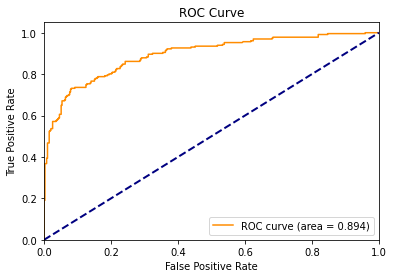

In [37]:
#Plotting ROC Curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df_train_y.values.ravel(), predict_lgbm)

import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">First, Model Metric Sumamry
   
   </p>

In [38]:
Accuracy_Rate = (tp + tn) / (tp + tn + fp + fn)
Recall_Rate = tp / (tp + fn)
Precision_Rate = tp / (tp + fp)
Specificity_Rate = tn / (tn + fp)
F1_Score = (Precision_Rate * Recall_Rate) / (Precision_Rate + Recall_Rate) * 2

print(" - Accuracy Rate    : {:2.3f} %".format(Accuracy_Rate*100))
print(" - Recall Rate      : {:2.3f} %".format(Recall_Rate*100))
print(" - Precision Rate   : {:2.3f} %".format(Precision_Rate*100))
print(" - Specificity Rate : {:2.3f} %".format(Specificity_Rate*100))
print(" - F1 Score         : {:2.3f} ".format(F1_Score*100))
print(" - ROC AUC          : {:2.3f} ".format(roc_auc*100))

 - Accuracy Rate    : 84.430 %
 - Recall Rate      : 69.697 %
 - Precision Rate   : 85.638 %
 - Specificity Rate : 93.112 %
 - F1 Score         : 76.850 
 - ROC AUC          : 89.429 


1. Counfusion Matrix
                   True Value 0  True Value 1
Predicted Value 0           140            35
Predicted Value 1            17            76

2. Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



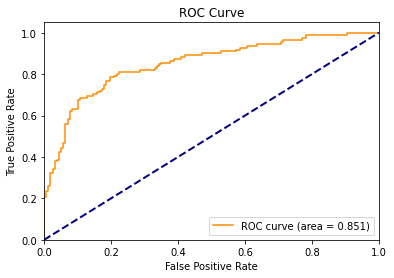

Second, Model Metric Sumamry
 - Accuracy Rate    : 80.597 %
 - Recall Rate      : 68.468 %
 - Precision Rate   : 81.720 %
 - Specificity Rate : 89.172 %
 - F1 Score         : 74.510 
 - ROC AUC          : 85.081 


In [39]:
#Predicting on Validation data
predict_lgbm = lgbm.predict_proba(df_val_x.values)[:,1]
pred_val = np.where(predict_lgbm > opt_threshold, 1., 0.)

tp, fn, fp, tn = confusion_matrix(df_val_y.values.ravel(), pred_val, labels=[1,0]).ravel()

conf_matrix = pd.DataFrame(
    confusion_matrix(df_val_y.values.ravel(), pred_val),
    columns=['Predicted Value 0', 'Predicted Value 1'],
    index=['True Value 0', 'True Value 1']
)

print("1. Counfusion Matrix")
print(conf_matrix.T)
print("")

print("2. Classification Report")
print(classification_report(df_val_y.values.ravel(), pred_val))

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df_val_y.values.ravel(), predict_lgbm)

import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy_Rate = (tp + tn) / (tp + tn + fp + fn)
Recall_Rate = tp / (tp + fn)
Precision_Rate = tp / (tp + fp)
Specificity_Rate = tn / (tn + fp)
F1_Score = (Precision_Rate * Recall_Rate) / (Precision_Rate + Recall_Rate) * 2

print("Second, Model Metric Sumamry")
print(" - Accuracy Rate    : {:2.3f} %".format(Accuracy_Rate*100))
print(" - Recall Rate      : {:2.3f} %".format(Recall_Rate*100))
print(" - Precision Rate   : {:2.3f} %".format(Precision_Rate*100))
print(" - Specificity Rate : {:2.3f} %".format(Specificity_Rate*100))
print(" - F1 Score         : {:2.3f} ".format(F1_Score*100))
print(" - ROC AUC          : {:2.3f} ".format(roc_auc*100))

1. Counfusion Matrix
                   True Value 0  True Value 1
Predicted Value 0           263            24
Predicted Value 1             3           128

2. Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       266
           1       0.98      0.84      0.90       152

    accuracy                           0.94       418
   macro avg       0.95      0.92      0.93       418
weighted avg       0.94      0.94      0.93       418



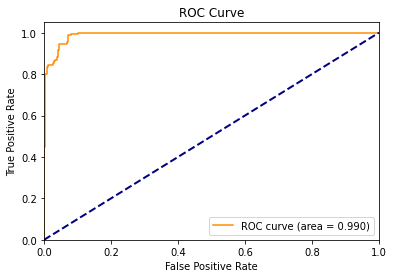

Third, Model Metric Sumamry
 - Accuracy Rate    : 93.541 %
 - Recall Rate      : 84.211 %
 - Precision Rate   : 97.710 %
 - Specificity Rate : 98.872 %
 - F1 Score         : 90.459 
 - ROC AUC          : 99.026 


In [40]:
predict_lgbm = lgbm.predict_proba(df_test_x.values)[:,1]
pred_test = np.where(predict_lgbm > opt_threshold, 1., 0.)

tp, fn, fp, tn = confusion_matrix(df_test_y.values.ravel(), pred_test, labels=[1,0]).ravel()

conf_matrix = pd.DataFrame(
    confusion_matrix(df_test_y.values.ravel(), pred_test),
    columns=['Predicted Value 0', 'Predicted Value 1'],
    index=['True Value 0', 'True Value 1']
)

print("1. Counfusion Matrix")
print(conf_matrix.T)
print("")

print("2. Classification Report")
print(classification_report(df_test_y.values.ravel(), pred_test))

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df_test_y.values.ravel(), predict_lgbm)

import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy_Rate = (tp + tn) / (tp + tn + fp + fn)
Recall_Rate = tp / (tp + fn)
Precision_Rate = tp / (tp + fp)
Specificity_Rate = tn / (tn + fp)
F1_Score = (Precision_Rate * Recall_Rate) / (Precision_Rate + Recall_Rate) * 2

print("Third, Model Metric Sumamry")
print(" - Accuracy Rate    : {:2.3f} %".format(Accuracy_Rate*100))
print(" - Recall Rate      : {:2.3f} %".format(Recall_Rate*100))
print(" - Precision Rate   : {:2.3f} %".format(Precision_Rate*100))
print(" - Specificity Rate : {:2.3f} %".format(Specificity_Rate*100))
print(" - F1 Score         : {:2.3f} ".format(F1_Score*100))
print(" - ROC AUC          : {:2.3f} ".format(roc_auc*100))

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Preparing submission materials
   
   </p>

In [41]:
test_result= pd.DataFrame(pred_test)
test_result.columns = ['Survived']
predict = test_result['Survived']
Id_No = df_test['PassengerId']
submission = pd.DataFrame({'PassengerId': Id_No, "Survived": predict})
submission['Survived'] = submission['Survived'].astype('Int64')
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Submitted the csv for the competition

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#a5d610;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
We are doing something right here, 😀, as after submission rank I got is under Top 12% 😀!!, follow me for more optimization on this and better results
</p>

<p style="font-family:cursive; font-size:18px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>